<a href="https://colab.research.google.com/github/NadavLib/ML_Part2/blob/main/ML_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load DataSet

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('selected_features.csv')
df


,posts_retweets,followers,profile_picture,previous_posts_count,age,num_hashtags,likes_per_followers,posts_per_followers,bit,feel,...,time_of_day_night,time_of_day_noon,text_length_category_long,text_length_category_medium,text_length_category_short,checkmark_blue,checkmark_gold,checkmark_grey,checkmark_none,sentiment
0,0.002766,0.003304,1.0,0.212077,0.065934,0.000000,0.000066,0.000832,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.000178,0.000290,0.0,0.000000,0.197802,0.000000,0.000644,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,0.000357,0.000425,1.0,0.132548,0.340659,0.000000,0.000425,0.003964,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.000357,0.000118,1.0,0.000000,0.285714,0.000000,0.000802,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.001249,0.001068,1.0,0.072165,0.274725,0.333333,0.000169,0.000871,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38481,0.000714,0.000987,1.0,0.000000,0.219780,0.000000,0.000268,0.000000,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
38482,0.000357,0.000941,1.0,0.220913,0.285714,0.333333,0.000618,0.003020,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
38483,0.011687,0.009431,0.0,0.092784,0.208791,0.000000,0.000320,0.000128,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
38484,0.000624,0.001331,1.0,0.092784,0.197802,0.000000,0.000261,0.000900,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


#Cross validation for Training & Validation Set

In [38]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


df_selected = pd.read_csv('selected_features.csv')
X = df_selected.drop(columns='sentiment')    # feature matrix
y = df_selected['sentiment']                  # true labels


#DT

##BaseLine tree

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score



# 1. Prepare 10‐fold stratified splitter
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 2. Baseline Decision Tree
baseline = DecisionTreeClassifier(random_state=42)

# 3. Baseline CV AUC–ROC
baseline_cv = cross_val_score(baseline, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"Baseline CV AUC-ROC: {baseline_cv.mean():.3f} ± {baseline_cv.std():.3f}")

# 4. Baseline Train AUC
baseline.fit(X, y)
baseline_train_auc = roc_auc_score(y, baseline.predict_proba(X)[:,1])
print(f"Baseline Train AUC-ROC: {baseline_train_auc:.3f}")


Baseline CV AUC: 0.811 ± 0.005
Baseline Train AUC: 1.000


##Tuned Tree - Grid Search

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
Best CV AUC–ROC: 0.930
Best params: {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Overall validation AUC–ROC: 0.930

Classification report on validation folds:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     21730
           1       0.80      0.85      0.83     16756

    accuracy                           0.85     38486
   macro avg       0.84      0.85      0.84     38486
weighted avg       0.85      0.85      0.85     38486



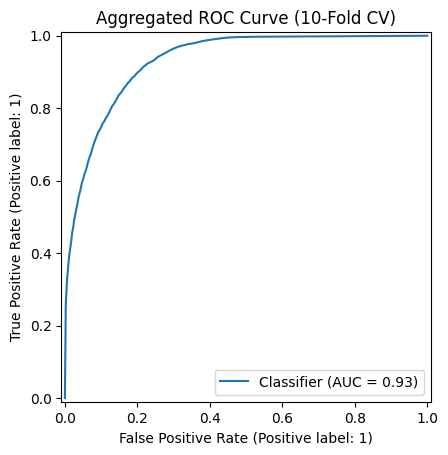

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import roc_auc_score, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt


# 1. Tune hyperparameters via 10-fold Stratified CV
dt = DecisionTreeClassifier(random_state=42)


param_grid = {
    'criterion':        ['gini','entropy'],
    'max_depth':        [3,5,7,9,None],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf': [1,2,5,10],
    'max_features':     [None,'sqrt','log2']
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(dt, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)
grid.fit(X, y)
best_dt = grid.best_estimator_
print(f"Best CV AUC–ROC: {grid.best_score_:.3f}")
print("Best params:", grid.best_params_)

# 2. Generate out-of-fold predictions on the validation folds
#    This gives you, for each sample, the model’s prediction from the fold
val_proba = cross_val_predict(
    estimator=best_dt,
    X=X,
    y=y,
    cv=cv,
    method='predict_proba',   # get probability estimates
    n_jobs=-1
)[:, 1]                       # probability of the positive class

# 3. Evaluate performance on the validation folds
val_auc = roc_auc_score(y, val_proba)
val_pred = (val_proba >= 0.5).astype(int)  # binary decisions at threshold=0.5

print(f"Overall validation AUC–ROC: {val_auc:.3f}")
print("\nClassification report on validation folds:")
print(classification_report(y, val_pred))

# 4. Plot the aggregated ROC curve across all folds
RocCurveDisplay.from_predictions(y, val_proba)
plt.title('Aggregated ROC Curve (10-Fold CV)')
plt.show()


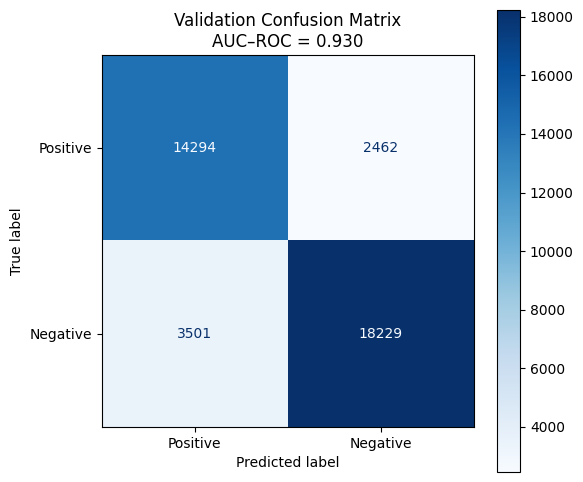

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Compute confusion matrix on your out-of-fold validation predictions
#    y and val_pred come from your cross_val_predict step
cm = confusion_matrix(y, val_pred, labels=[1, 0])

# 2. Plot it as a heatmap with counts
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Positive', 'Negative']
)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title(f'Validation Confusion Matrix\nAUC–ROC = {val_auc:.3f}')
plt.show()


##Comparison Tuned vs. Baseline

In [47]:
# 1. Compute Training AUC–ROC on full train set
train_proba = best_dt.predict_proba(X)[:, 1]
train_auc = roc_auc_score(y, train_proba)

# 2. Compute Validation AUC–ROC from out-of-fold predictions
#    (נניח ש־val_proba מחושב כבר ב-cross_val_predict)
val_auc   = roc_auc_score(y, val_proba)

print(f"Tuned Training AUC–ROC:   {train_auc:.3f}")
print(f"Tuned Validation AUC–ROC: {val_auc:.3f}")

# 4. Baseline Train AUC
baseline.fit(X, y)
baseline_train_auc = roc_auc_score(y, baseline.predict_proba(X)[:,1])
print(f"Baseline Train AUC-ROC: {baseline_train_auc:.3f}")


# 3. Baseline CV AUC–ROC
baseline_cv = cross_val_score(baseline, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"Baseline Validation AUC-ROC: {baseline_cv.mean():.3f}")



# 1. Fit the baseline (default) tree on all data
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X, y)

# 2. Print its structure stats
print("Baseline tree:")
print(f"  Number of nodes: {baseline_dt.tree_.node_count}")
print(f"  Maximum depth:   {baseline_dt.tree_.max_depth}")

# 3. Fit the tuned tree on all data
best_dt.fit(X, y)

# 4. Print its structure stats
print("\nTuned tree:")
print(f"  Number of nodes: {best_dt.tree_.node_count}")
print(f"  Maximum depth:   {best_dt.tree_.max_depth}")



Tuned Training AUC–ROC:   0.942
Tuned Validation AUC–ROC: 0.930
Baseline Train AUC-ROC: 1.000
Baseline Validation AUC-ROC: 0.811
Baseline tree:
  Number of nodes: 8691
  Maximum depth:   35

Tuned tree:
  Number of nodes: 477
  Maximum depth:   9


##tree plot

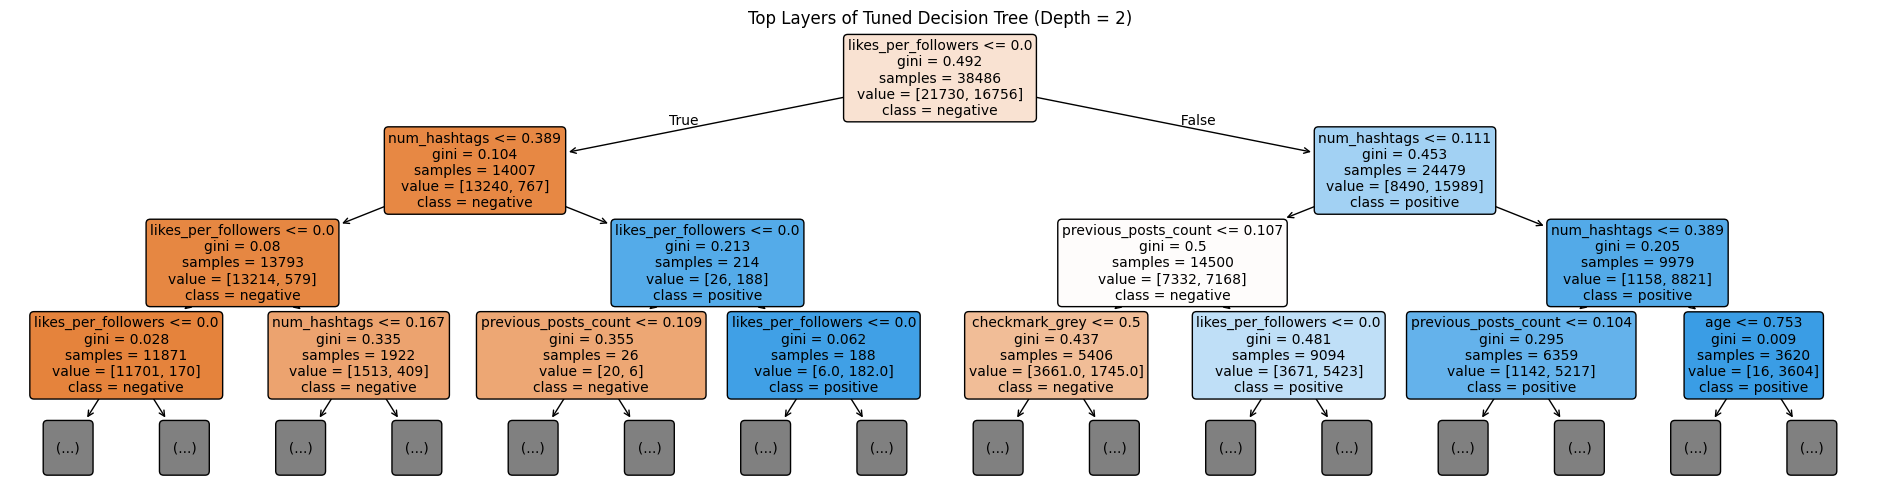

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 6))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['negative', 'positive'],
    max_depth=3,        # show only root + its immediate children
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Top Layers of Tuned Decision Tree (Depth = 2)")
plt.show()


##feature importance

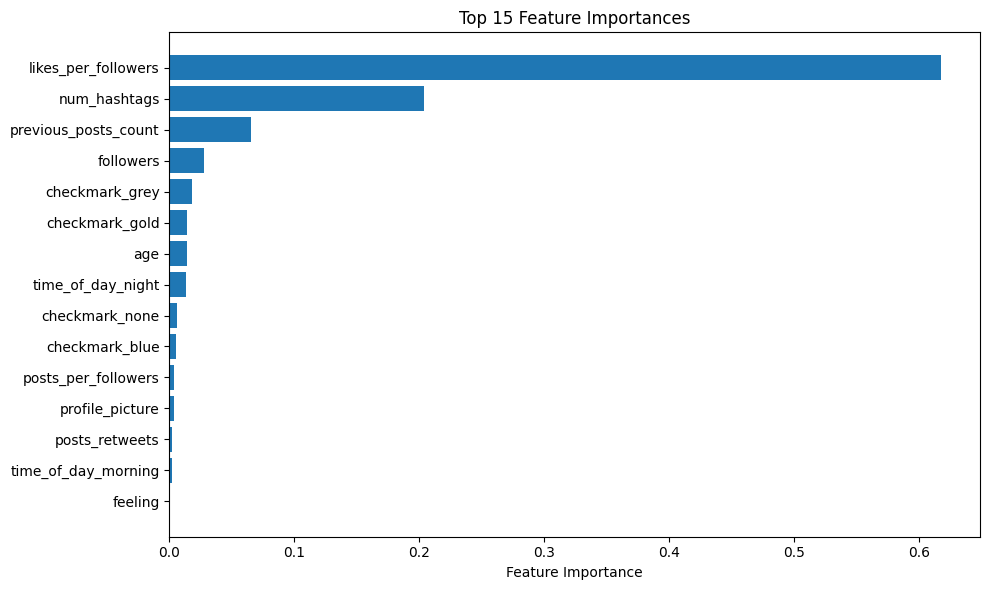

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Recompute feature importances
importances = pd.Series(best_dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# 2. Select top 20 features
top_importances = importances.head(15)

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_importances.index[::-1], top_importances.values[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()


#ANN

##